In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data2 = pd.read_csv('drugLibTrain_raw.csv')
data2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


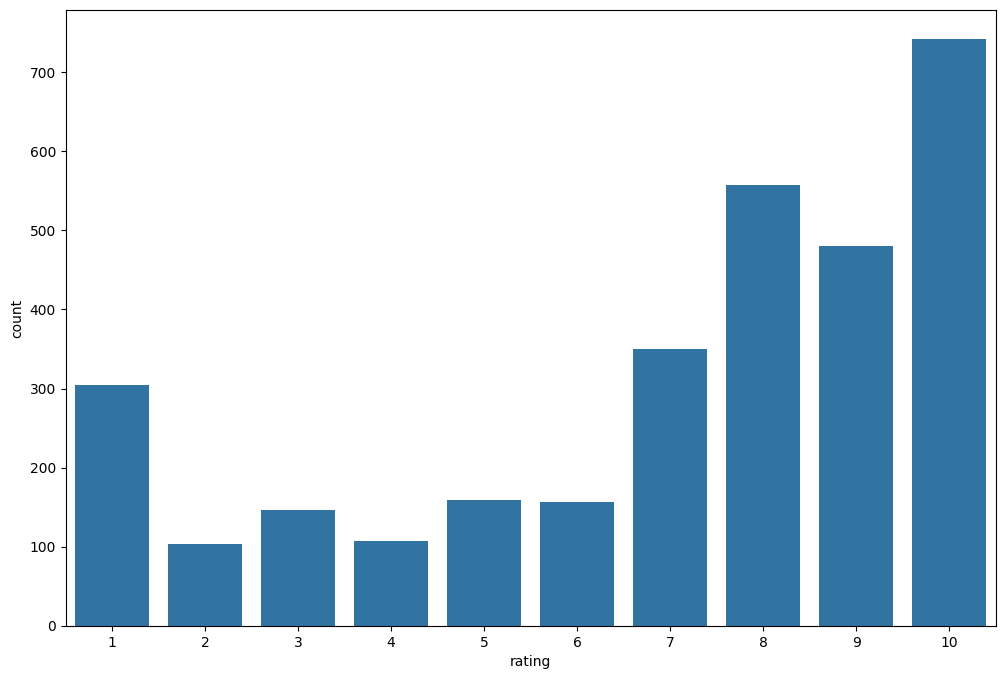

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=data2)
plt.show()

In [3]:
def map_ratings(rating):
    if rating in range(1, 6):
        return 0
    elif rating in range(6, 11):
        return 1
    else:
        return None 
    
data2['rating'] = data2['rating'].apply(map_ratings)
data2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,0,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,1,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,0,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,0,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [4]:
data2['Text'] = data2['benefitsReview'] + " " + data2['sideEffectsReview'] + " " + data2['commentsReview']
data2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Text
0,2202,enalapril,0,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...
1,3117,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...
2,1146,ponstel,1,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...
3,3947,prilosec,0,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...
4,1951,lyrica,0,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...


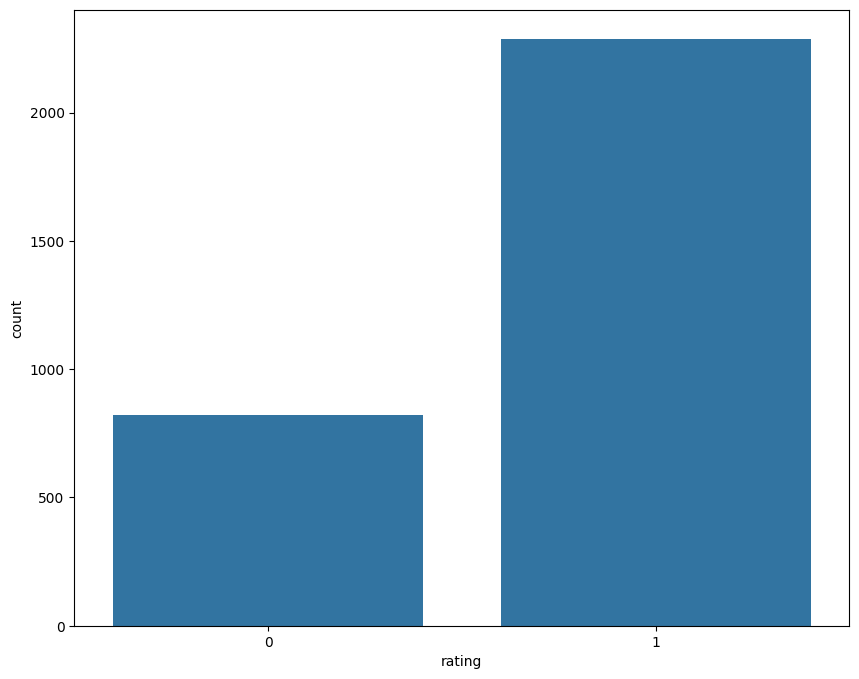

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating', data=data2)
plt.show()

In [5]:
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from textblob import Word 
import spacy
import re

In [6]:
data2

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Text
0,2202,enalapril,0,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...
1,3117,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...
2,1146,ponstel,1,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...
3,3947,prilosec,0,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...
4,1951,lyrica,0,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...
...,...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,1,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett..."
3103,3281,zoloft,0,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,Emotions were somewhat blunted. Less moodiness...
3104,1664,climara,0,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,--- Constant issues with the patch not staying...
3105,2621,trileptal,1,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,Controlled complex partial seizures. Dizziness...


In [7]:
data2['lower_case'] = data2['Text'].astype('str').apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
data2['lower_case'] = data2['lower_case'].apply(lambda x: re.sub(r'&#039;', '\'', x))
data2['lower_case'] = data2['lower_case'].apply(lambda x: re.sub(r'&[^;]*;', '', x))
data2['alphabatic'] = data2['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
data2['without-link'] = data2['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

tokenizer = RegexpTokenizer(r'\w+')
data2['Special_word'] = data2.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1) 

stop_words = set(stopwords.words('english'))
data2['stop_words'] = data2['Special_word'].apply(lambda x: [item for item in x if item not in stop_words])
stop = ["my","ive","im", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "here", "some","day"]
data2['stop_words'] = data2['stop_words'].apply(lambda x: [item for item in x if item not in stop])

data2['stop_words'] = data2['stop_words'].astype('str')

data2['short_word'] = data2['stop_words'].str.findall('\w{2,}')
data2['string']=data2['short_word'].str.join(' ') 

data2.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string
0,2202,enalapril,0,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,"[slowed, the, progression, of, left, ventricul...","['slowed', 'progression', 'left', 'ventricular...","[slowed, progression, left, ventricular, dysfu...",slowed progression left ventricular dysfunctio...
1,3117,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...,although this type of birth control has more c...,although this type of birth control has more c...,although this type of birth control has more c...,"[although, this, type, of, birth, control, has...","['although', 'type', 'birth', 'control', 'cons...","[although, type, birth, control, cons, pros, h...",although type birth control cons pros help cra...
2,1146,ponstel,1,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,i was used to having cramps so badly that they...,i was used to having cramps so badly that they...,i was used to having cramps so badly that they...,"[i, was, used, to, having, cramps, so, badly, ...","['used', 'cramps', 'badly', 'would', 'leave', ...","[used, cramps, badly, would, leave, balled, be...",used cramps badly would leave balled bed least...
3,3947,prilosec,0,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,the acid reflux went away for a few months aft...,the acid reflux went away for a few months aft...,the acid reflux went away for a few months aft...,"[the, acid, reflux, went, away, for, a, few, m...","['acid', 'reflux', 'went', 'away', 'months', '...","[acid, reflux, went, away, months, days, drug,...",acid reflux went away months days drug heartbu...
4,1951,lyrica,0,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...,i think that the lyrica was starting to help w...,i think that the lyrica was starting to help w...,i think that the lyrica was starting to help w...,"[i, think, that, the, lyrica, was, starting, t...","['think', 'lyrica', 'starting', 'help', 'pain'...","[think, lyrica, starting, help, pain, side, ef...",think lyrica starting help pain side effects s...


In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: for additional language support
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mrudula\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
from nltk.tag import pos_tag
def get_wordnet_pos(treebank_tag):
    """Convert treebank POS tags to WordNet POS tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if POS is unknown

def lemmatize_sentence(sentence):
    # Tokenize the sentence
    words = nltk.word_tokenize(sentence)
    # Get POS tags for each word
    pos_tags = pos_tag(words)
    # Lemmatize each word with the correct POS tag
    lemmatized_sentence = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_sentence)

In [10]:
data2['Lemmatized_Text'] = data2['string'].apply(lemmatize_sentence)

In [17]:
from textblob import TextBlob

def spell_check(text):
   
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return str(corrected_text)

In [41]:
data2

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,Text,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Lemmatized_Text
0,2202,enalapril,0,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,"[slowed, the, progression, of, left, ventricul...","['slowed', 'progression', 'left', 'ventricular...","[slowed, progression, left, ventricular, dysfu...",slowed progression left ventricular dysfunctio...,slow progression leave ventricular dysfunction...
1,3117,ortho-tri-cyclen,0,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",Although this type of birth control has more c...,although this type of birth control has more c...,although this type of birth control has more c...,although this type of birth control has more c...,"[although, this, type, of, birth, control, has...","['although', 'type', 'birth', 'control', 'cons...","[although, type, birth, control, cons, pros, h...",although type birth control cons pros help cra...,although type birth control con pros help cram...
2,1146,ponstel,1,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,I was used to having cramps so badly that they...,i was used to having cramps so badly that they...,i was used to having cramps so badly that they...,i was used to having cramps so badly that they...,"[i, was, used, to, having, cramps, so, badly, ...","['used', 'cramps', 'badly', 'would', 'leave', ...","[used, cramps, badly, would, leave, balled, be...",used cramps badly would leave balled bed least...,use cramp badly would leave ball bed least day...
3,3947,prilosec,0,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,The acid reflux went away for a few months aft...,the acid reflux went away for a few months aft...,the acid reflux went away for a few months aft...,the acid reflux went away for a few months aft...,"[the, acid, reflux, went, away, for, a, few, m...","['acid', 'reflux', 'went', 'away', 'months', '...","[acid, reflux, went, away, months, days, drug,...",acid reflux went away months days drug heartbu...,acid reflux go away month day drug heartburn s...
4,1951,lyrica,0,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,I think that the Lyrica was starting to help w...,i think that the lyrica was starting to help w...,i think that the lyrica was starting to help w...,i think that the lyrica was starting to help w...,"[i, think, that, the, lyrica, was, starting, t...","['think', 'lyrica', 'starting', 'help', 'pain'...","[think, lyrica, starting, help, pain, side, ef...",think lyrica starting help pain side effects s...,think lyrica start help pain side effect sever...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,1,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...","Increased focus, attention, productivity. Bett...","increased focus, attention, productivity. bett...",increased focus atte

In [11]:
X = data2['Lemmatized_Text']
y = data2['rating']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(ngram_range=(1, 3))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

X_counts = count_vect.fit_transform(X)
X_tfidf = transformer.fit_transform(X_counts)

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = LogisticRegression()

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1
              precision    recall  f1-score   support

           0       0.67      0.29      0.41        82
           1       0.79      0.95      0.86       229

    accuracy                           0.77       311
   macro avg       0.73      0.62      0.63       311
weighted avg       0.76      0.77      0.74       311

Fold 2
              precision    recall  f1-score   support

           0       0.56      0.24      0.34        82
           1       0.77      0.93      0.85       229

    accuracy                           0.75       311
   macro avg       0.67      0.59      0.59       311
weighted avg       0.72      0.75      0.71       311

Fold 3
              precision    recall  f1-score   support

           0       0.92      0.27      0.42        82
           1       0.79      0.99      0.88       229

    accuracy                           0.80       311
   macro avg       0.85      0.63      0.65       311
weighted avg       0.82      0.80      0.76       311

In [26]:
from sklearn.svm import LinearSVC, SVC
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize oversampler
oversampler = RandomOverSampler(random_state=42)

# Model (replace with your preferred model)
model = LinearSVC(tol=1e-4, C=0.5, multi_class='ovr', max_iter=5000)

accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1
              precision    recall  f1-score   support

           0       0.62      0.24      0.35        82
           1       0.78      0.95      0.85       229

    accuracy                           0.76       311
   macro avg       0.70      0.60      0.60       311
weighted avg       0.74      0.76      0.72       311

Fold 2
              precision    recall  f1-score   support

           0       0.58      0.23      0.33        82
           1       0.77      0.94      0.85       229

    accuracy                           0.75       311
   macro avg       0.67      0.59      0.59       311
weighted avg       0.72      0.75      0.71       311

Fold 3
              precision    recall  f1-score   support

           0       0.95      0.23      0.37        82
           1       0.78      1.00      0.88       229

    accuracy                           0.79       311
   macro avg       0.87      0.61      0.62       311
weighted avg       0.83      0.79      0.74       311

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Initialize StratifiedKFold and RandomOverSampler
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oversampler = RandomOverSampler(random_state=42)

model = DecisionTreeClassifier(criterion='entropy', min_samples_split=5, min_samples_leaf=4, max_depth=5, random_state=42)

# Lists to store the performance metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    print(f"Fold {fold + 1}")
    
    # Split data into training and test sets
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Upsample the training data
    X_train_upsampled, y_train_upsampled = oversampler.fit_resample(X_train, y_train)
    
    # Train the Decision Tree model
    model.fit(X_train_upsampled, y_train_upsampled)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Evaluate the model and print classification report
    print(classification_report(y_test, y_pred))
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append metrics for each fold
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Print overall performance across all folds
print("\nOverall Model Performance Across All Folds:")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Precision: {np.mean(precisions):.4f}")
print(f"Recall: {np.mean(recalls):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f}")

Fold 1
              precision    recall  f1-score   support

           0       0.29      0.79      0.42       164
           1       0.80      0.29      0.43       458

    accuracy                           0.42       622
   macro avg       0.54      0.54      0.42       622
weighted avg       0.66      0.42      0.42       622

Fold 2
              precision    recall  f1-score   support

           0       0.42      0.37      0.39       164
           1       0.78      0.82      0.80       458

    accuracy                           0.70       622
   macro avg       0.60      0.59      0.60       622
weighted avg       0.69      0.70      0.69       622

Fold 3
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       164
           1       0.81      0.83      0.82       457

    accuracy                           0.73       621
   macro avg       0.65      0.64      0.64       621
weighted avg       0.72      0.73      0.73       621

Deep Learning

In [12]:
from keras.layers import Embedding

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [14]:
import tensorflow as tf
from keras.preprocessing import sequence

In [15]:
from collections import Counter

# Tokenize the text and fit on the data
token = tf.keras.preprocessing.text.Tokenizer()
token.fit_on_texts(data2.Lemmatized_Text)

# Get the number of unique words
max_features = len(token.word_index)

print(f'Max features (vocab size): {max_features}')

Max features (vocab size): 11459


In [16]:
sequences = token.texts_to_sequences(data2.Lemmatized_Text)

sequence_lengths = [len(seq) for seq in sequences]

max_length = max(sequence_lengths)

print(f'Max sequence length: {max_length}')
print(f'Median sequence length: {np.median(sequence_lengths)}')

Max sequence length: 394
Median sequence length: 50.0


In [17]:
token=tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
token.fit_on_texts(data2.Lemmatized_Text)

In [18]:
X_train_seq=token.texts_to_sequences(X_train)
X_test_seq=token.texts_to_sequences(X_test)

In [19]:
X_train_pad = sequence.pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = sequence.pad_sequences(X_test_seq, maxlen=max_length)

In [ ]:
'''from keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)'''

In [39]:
import urllib.request, zipfile

url = 'http://nlp.stanford.edu/data/glove.6B.zip'
urllib.request.urlretrieve(url, 'glove.6B.zip')

output_path = 'glove.6B.zip'

# Download the file from the URL
print("Downloading GloVe embeddings...")
urllib.request.urlretrieve(url, output_path)

with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall('glove_files')

In [20]:
from gensim.scripts.glove2word2vec import glove2word2vec


glove_input_file = 'glove_files/glove.6B.300d.txt'  # Use the 300d version, or change to 50d, 100d, or 200d as needed
word2vec_output_file = 'glove.6B.300d.word2vec.txt'


glove2word2vec(glove_input_file, word2vec_output_file)

C:\Users\Mrudula\AppData\Local\Temp\ipykernel_12092\4091562953.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


(400000, 300)

In [21]:
from gensim.models import KeyedVectors

word2vec_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)


In [22]:
embedding_dim = 300
embedding_matrix = np.zeros((max_features + 1, embedding_dim))
print(embedding_matrix.shape)

for word, i in sorted(token.word_index.items(),key=lambda x:x[1]):
    if i > (max_features+1):
        break
    try:
        embedding_vector = word2vec_model[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix[i] = embedding_vector
    except:
        pass

(11460, 300)


In [23]:
import tensorflow as tf
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [24]:
from keras.models import Sequential, Model
from keras.layers import LSTM, GRU,SimpleRNN
from keras.layers import Dense, Activation, Dropout, Conv1D, BatchNormalization, ReLU
from keras.layers import SpatialDropout1D, GlobalMaxPooling1D, Concatenate
from keras.callbacks import EarlyStopping

In [59]:
model1 = Sequential()
model1.add(tf.keras.layers.Embedding(max_features + 1,
                     embedding_dim,
                     weights=[embedding_matrix],
                     input_length=max_length,
                     trainable=False))
model1.add(SpatialDropout1D(0.3))
model1.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [60]:
history1 = model1.fit(X_train_pad, y_train, epochs=100, batch_size=128,validation_split=0.15,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.6983 - loss: 0.6049 - val_accuracy: 0.7212 - val_loss: 0.6209
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 76s 5s/step - accuracy: 0.7334 - loss: 0.5883 - val_accuracy: 0.7292 - val_loss: 0.5858
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.7316 - loss: 0.5608 - val_accuracy: 0.7319 - val_loss: 0.5849
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 69s 4s/step - accuracy: 0.7340 - loss: 0.5420 - val_accuracy: 0.7212 - val_loss: 0.5651
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.7341 - loss: 0.5426 - val_accuracy: 0.7024 - val_loss: 0.5765
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.7423 - loss: 0.5222 - val_accuracy: 0.7373 - val_loss: 0.5499
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.7652 - loss: 0.5023 - val_accuracy: 0.7292 - val_loss: 0.5660
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.7636 - loss: 0.4917 - val_accuracy: 0.7265 - v

In [61]:
accr1 = model1.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 399ms/step - accuracy: 0.7785 - loss: 0.5499
Test set
  Loss: 0.584
  Accuracy: 0.754
